In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv(r"C:\\Users\\Owner\Desktop\ostk_2.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,19.830000,20.330000,19.059999,19.770000,19.770000,146500
1,2008-08-11,19.780001,20.780001,19.330000,20.129999,20.129999,296500
2,2008-08-12,20.200001,20.790001,19.629999,20.150000,20.150000,185800
3,2008-08-13,20.260000,21.080000,20.260000,20.660000,20.660000,242000
4,2008-08-14,20.209999,20.820000,19.980000,20.760000,20.760000,183800
...,...,...,...,...,...,...,...
2903,2020-02-21,9.150000,9.310000,9.000000,9.260000,9.260000,1120000
2904,2020-02-24,8.860000,9.690000,8.830000,9.220000,9.220000,1472500
2905,2020-02-25,9.130000,9.340000,7.500000,7.840000,7.840000,2318500
2906,2020-02-26,7.950000,8.230000,7.410000,7.490000,7.490000,1040300


In [3]:
data_training = data[data['Date'] < '2019-10-31'].copy()
data_testing = data[data['Date'] >= '2019-10-31'].copy()

In [4]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [5]:
data_training.shape

(2827, 5)

In [6]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.18175128, 0.18019825, 0.18741685, 0.18024178, 0.00679236],
       [0.1811381 , 0.18550862, 0.19100824, 0.18463791, 0.01469658],
       [0.18628894, 0.18562663, 0.19499865, 0.18488215, 0.00886327],
       ...,
       [0.0816777 , 0.08059948, 0.08007449, 0.0731469 , 0.13763885],
       [0.07272504, 0.06997876, 0.07249268, 0.06691904, 0.09639989],
       [0.066961  , 0.06679254, 0.07156158, 0.06899499, 0.05993508]])

In [7]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training[i-100:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
x_train.shape

(2727, 100, 5)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [10]:
regressor = Sequential()

regressor.add(LSTM(units = 70, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 90, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 110, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [11]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 70)           21280     
_________________________________________________________________
dropout (Dropout)            (None, 100, 70)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 90)           57960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 90)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 110)          88440     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 110)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               1

In [12]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 125, batch_size = 32)

Epoch 1/125
86/86 [==============================] - 27s 308ms/step - loss: 0.0050
Epoch 2/125
86/86 [==============================] - 25s 295ms/step - loss: 0.0021
Epoch 3/125
86/86 [==============================] - 27s 308ms/step - loss: 0.0020
Epoch 4/125
86/86 [==============================] - 27s 318ms/step - loss: 0.0018
Epoch 5/125
86/86 [==============================] - 28s 322ms/step - loss: 0.0015
Epoch 6/125
86/86 [==============================] - 28s 326ms/step - loss: 0.0016
Epoch 7/125
86/86 [==============================] - 27s 317ms/step - loss: 0.0014
Epoch 8/125
86/86 [==============================] - 29s 336ms/step - loss: 0.0014
Epoch 9/125
86/86 [==============================] - 29s 338ms/step - loss: 0.0013
Epoch 10/125
86/86 [==============================] - 27s 310ms/step - loss: 0.0011
Epoch 11/125
86/86 [==============================] - 29s 340ms/step - loss: 0.0015
Epoch 12/125
86/86 [==============================] - 34s 396ms/step - loss: 0.0012
E

In [13]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2827,2019-10-31,10.50,10.72,10.16,10.53,10.53,1283500
2828,2019-11-01,10.36,10.64,10.25,10.31,10.31,869400
2829,2019-11-04,10.38,10.50,10.07,10.22,10.22,1163900
2830,2019-11-05,10.22,10.30,9.77,10.03,10.03,1414300
2831,2019-11-06,10.05,10.25,9.88,10.01,10.01,771700


In [14]:
past_60_days = data_testing.tail(60)

In [15]:
df = past_60_days.append(data_testing, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.46,7.69,7.25,7.53,1453200
1,7.38,7.65,7.27,7.50,1114600
2,7.61,7.75,7.48,7.55,979500
3,7.62,7.68,7.25,7.26,922200
4,7.28,7.53,7.26,7.36,993600


In [16]:
inputs = scaler.transform(df)
inputs

array([[0.0300466 , 0.03103611, 0.03032721, 0.03077299, 0.07564867],
       [0.02906549, 0.03056408, 0.03059324, 0.03040664, 0.05780621],
       [0.03188619, 0.03174416, 0.03338654, 0.03101722, 0.05068714],
       [0.03200883, 0.0309181 , 0.03032721, 0.02747588, 0.04766773],
       [0.0278391 , 0.02914798, 0.03046023, 0.02869703, 0.05143014],
       [0.02918813, 0.02820392, 0.02806597, 0.02674319, 0.05639399],
       [0.02685798, 0.02584376, 0.02700186, 0.0251557 , 0.04688784],
       [0.02477312, 0.02548973, 0.02593775, 0.0260105 , 0.05397003],
       [0.02685798, 0.02997404, 0.02766693, 0.02881915, 0.16309571],
       [0.02992396, 0.02867595, 0.028332  , 0.0260105 , 0.05900238],
       [0.02563159, 0.02690583, 0.02753392, 0.02503358, 0.06009843],
       [0.02526367, 0.02454567, 0.02646981, 0.02466724, 0.0469985 ],
       [0.02465048, 0.02513571, 0.02686885, 0.02564416, 0.04247202],
       [0.02673534, 0.02525372, 0.02846502, 0.02637685, 0.03593786],
       [0.02612215, 0.02560774, 0.

In [17]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])
    
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((81, 60, 5), (81,))

In [18]:
x_test.shape

(81, 60, 5)

In [19]:
y_pred = regressor.predict(x_test)

In [20]:
scaler.scale_

array([1.22639191e-02, 1.18008020e-02, 1.33014096e-02, 1.22115029e-02,
       5.26948127e-08])

In [21]:
scale = 1 / 1.34934562e-02
scale

74.1099971110441

In [22]:
y_pred = y_pred * scale 
y_test = y_test * scale

In [23]:
y_pred.shape

(81, 1)

In [24]:
y_test.shape

(81,)

In [30]:
y_pred[40:]

array([[3.8449616],
       [3.833347 ],
       [3.8276768],
       [3.8275974],
       [3.8401976],
       [3.957552 ],
       [4.163969 ],
       [4.3472285],
       [4.443476 ],
       [4.5213203],
       [4.584711 ],
       [4.7308054],
       [4.925879 ],
       [5.0633535],
       [5.1288524],
       [5.2256794],
       [5.3520737],
       [5.3719826],
       [5.2836432],
       [5.1611395],
       [5.092633 ],
       [5.1001973],
       [5.1147633],
       [5.083392 ],
       [5.022731 ],
       [4.947522 ],
       [4.9271436],
       [4.9659004],
       [5.0330677],
       [5.0692053],
       [5.1350365],
       [5.286693 ],
       [5.417931 ],
       [5.535875 ],
       [5.5876274],
       [5.626335 ],
       [5.7071   ],
       [5.804484 ],
       [5.8785872],
       [5.6950064],
       [5.454542 ]], dtype=float32)

In [31]:
y_test[40:]

array([1.76322528, 1.69960375, 1.88137955, 1.76322528, 1.97226745,
       2.96294557, 2.56303881, 2.62666034, 2.76299219, 2.85388009,
       2.73572582, 3.60824967, 3.26287564, 3.26287564, 3.2083429 ,
       3.7627591 , 3.40829628, 2.95385678, 2.67210429, 2.61757155,
       2.85388009, 2.89932404, 2.92659041, 2.82661372, 2.69028187,
       2.71754824, 2.76299219, 3.14472137, 3.04474468, 3.12654379,
       3.50827297, 3.79911426, 3.62642725, 3.61733846, 3.56280571,
       3.65369362, 3.7627591 , 3.49918418, 3.74458152, 2.67210429,
       2.14495446])

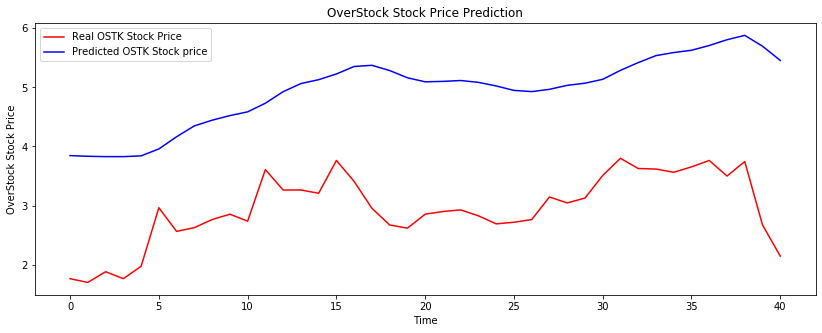

In [32]:
plt.figure(figsize = (14,5))
plt.plot(y_test[40:], color = 'red', label = 'Real OSTK Stock Price')
plt.plot(y_pred[40:], color = 'blue', label = 'Predicted OSTK Stock price')
plt.title('OverStock Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('OverStock Stock Price')
plt.legend()
plt.show()